In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sls
import seaborn as sns
from scipy import stats

In [16]:
df= pd.read_csv(r"C:\Users\dkber\Downloads\healthcare-dataset-stroke-data.csv")

In [18]:
df.shape

(5110, 12)

In [20]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [24]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [26]:
df['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

In [28]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [30]:
# females are more in this dataset
index_to_drop = df[df['gender']=='other'].index
df.drop(index_to_drop, inplace=True)

Text(0.5, 1.0, 'GENDER')

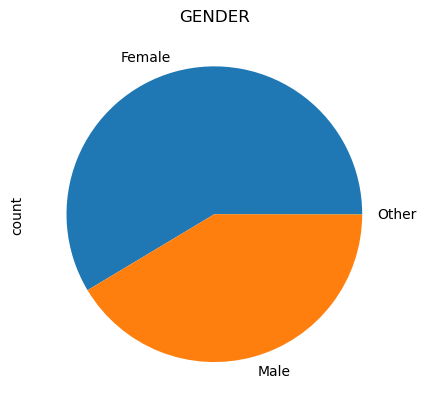

In [32]:
df['gender'].value_counts().plot(kind= "pie")
plt.title("GENDER")

In [34]:
df['age'].value_counts()

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

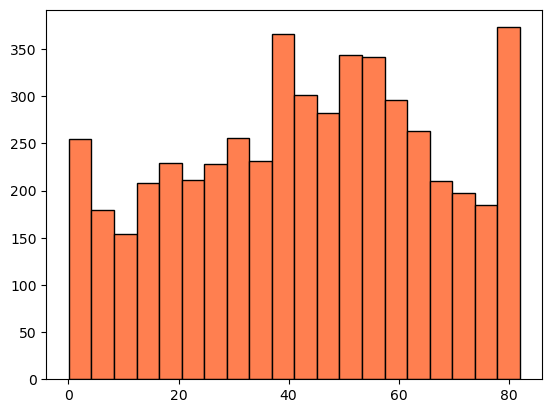

In [36]:
plt.hist(df['age'], bins= 20, color='coral', edgecolor='black', linewidth=1)
plt.title='AGE'
plt.xlablel='age'
plt.ylalbel='frequency'
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [40]:
df['hypertension'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       1
       ..
5105    1
5106    0
5107    0
5108    0
5109    0
Name: hypertension, Length: 5110, dtype: int64>

In [42]:
hypertension_count= df['hypertension'].value_counts()
hypertension_percentage= df['hypertension'].value_counts(normalize= True)*100
freq_table= pd.DataFrame({'Count':hypertension_count,'Percentage %':hypertension_percentage})
freq_table

,Count,Percentage %
hypertension,,
0,4612,90.254403
1,498,9.745597


<Axes: ylabel='count'>

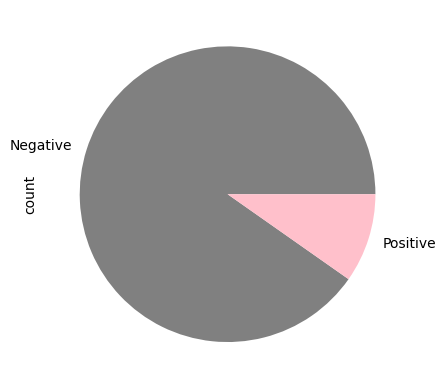

In [44]:
df['hypertension'].value_counts().plot(kind= 'pie',labels=['Negative','Positive'], colors=['grey', 'pink'])
# most people don't have hypertension

In [46]:
df['heart_disease'].unique()

array([1, 0], dtype=int64)

In [48]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [50]:
heart_disease_count= df['heart_disease'].value_counts()
heart_disease_percentage= df['heart_disease'].value_counts(normalize= True)*100
freq_table1= pd.DataFrame({'Count':heart_disease_count,'Percentage %':heart_disease_percentage})
freq_table1

,Count,Percentage %
heart_disease,,
0,4834,94.598826
1,276,5.401174


<BarContainer object of 2 artists>

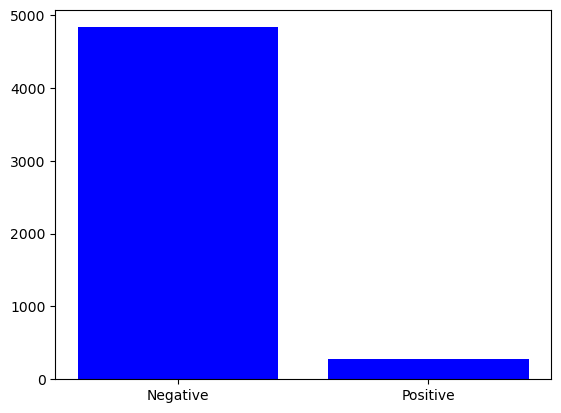

In [52]:
plt.bar(['Negative','Positive'], df['heart_disease'].value_counts(), color=['blue'])
# in general people don't suffer from heart diseases 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [56]:
# irrelevant data
df.drop('ever_married',axis=1, inplace= True)

In [58]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [60]:
job_count=df['work_type'].value_counts()
job_percent=df['work_type'].value_counts(normalize=True)*100
freq_table2=pd.DataFrame({'Count':job_count,'Percentage %':job_percent})
freq_table2

,Count,Percentage %
work_type,,
Private,2925,57.240705
Self-employed,819,16.027397
children,687,13.444227
Govt_job,657,12.857143
Never_worked,22,0.430528


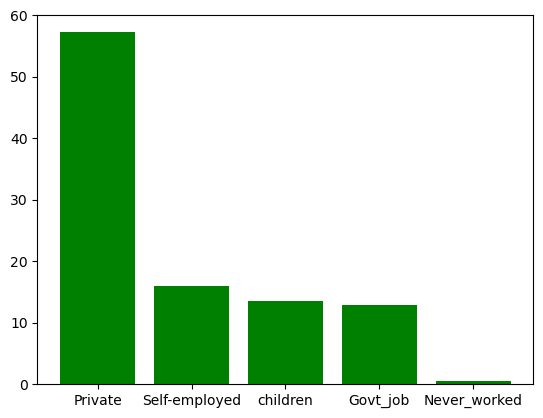

In [62]:
work_percent= df['work_type'].value_counts(normalize=True)*100
plt.bar(work_percent.index, work_percent.values, color='green')
plt.show()
# people working in private sector are prone to heart strokes

In [64]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

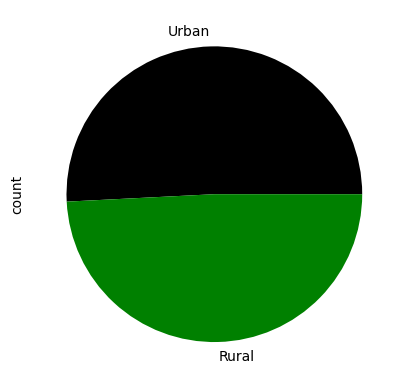

In [66]:
df['Residence_type'].value_counts().plot(kind= 'pie',labels=['Urban','Rural'], colors=['black', 'green'])
# the chances of heart stroke are equally likely for both urban and rural.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 439.3+ KB


In [70]:
df['avg_glucose_level'].unique

<bound method Series.unique of 0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64>

In [72]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

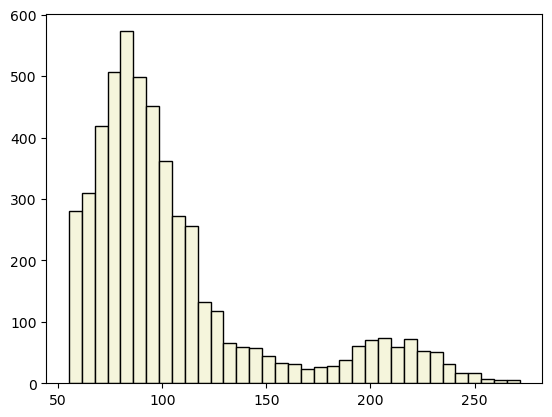

In [74]:
plt.hist(df['avg_glucose_level'], bins= 35, color='beige', edgecolor='black', linewidth=1)
plt.title=' AVG GLUCOSE LEVEL'
plt.xlablel='glucose_level'
plt.ylalbel='frequency'
plt.show()
# it is a right skewed data
# Fasting blood glucose level: 70 to 99 mg/dL
# Random blood sugar level: 70–140 mg/dL
# People with diabetes tend to have slightly higher blood glucose levels, around 80–180 mg/dL

In [76]:
df['bmi'].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

In [78]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [80]:
df['bmi'].isnull().value_counts()

bmi
False    4909
True      201
Name: count, dtype: int64

In [82]:
df.dropna(inplace=True)

<Axes: ylabel='bmi'>

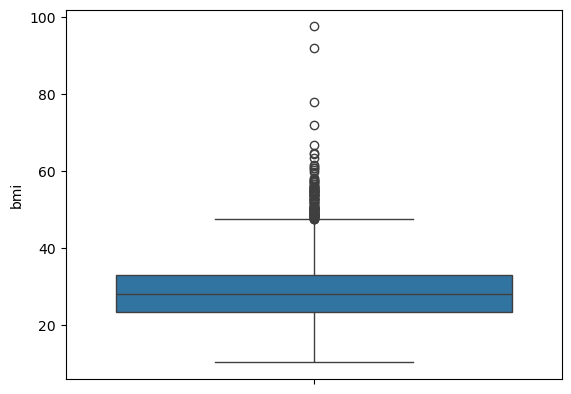

In [84]:
sls.boxplot(df['bmi'])

In [86]:
Q1= df['bmi'].quantile(0.25)
Q3= df['bmi'].quantile(0.75)
IQR= Q3-Q1
lower_bound= Q1- 1.5*IQR
upper_bound= Q3+ 1.5*IQR
outliers= df[(df['bmi'] <= lower_bound) | (df['bmi'] >= upper_bound)]
df.drop(outliers.index, inplace=True)

In [88]:
df.shape

(4796, 11)

<Axes: ylabel='bmi'>

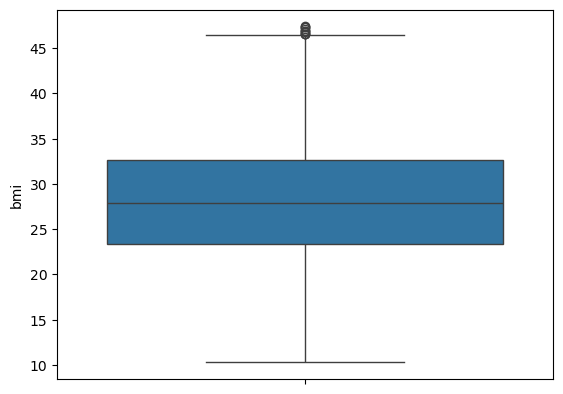

In [90]:
sls.boxplot(df['bmi'])

TypeError: 'str' object is not callable

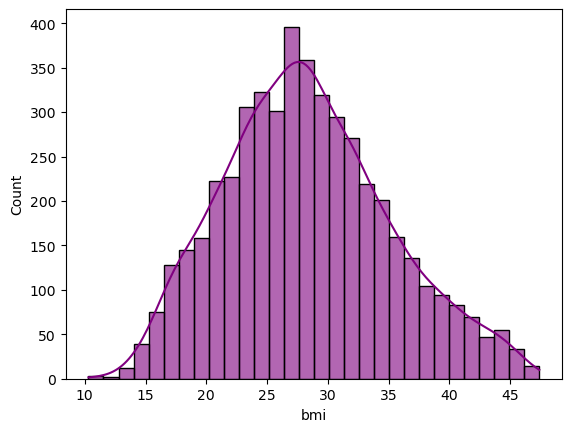

In [92]:
sns.histplot(df['bmi'],bins=30,kde=True,color='purple',edgecolor='black',linewidth=1,alpha=0.6)
plt.title('BMI')
plt.xlabel('BMI Level')
plt.ylabel('Freq')
plt.show()

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4796 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4796 non-null   int64  
 1   gender             4796 non-null   object 
 2   age                4796 non-null   float64
 3   hypertension       4796 non-null   int64  
 4   heart_disease      4796 non-null   int64  
 5   work_type          4796 non-null   object 
 6   Residence_type     4796 non-null   object 
 7   avg_glucose_level  4796 non-null   float64
 8   bmi                4796 non-null   float64
 9   smoking_status     4796 non-null   object 
 10  stroke             4796 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 449.6+ KB


In [96]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1802
Unknown            1458
formerly smoked     815
smokes              721
Name: count, dtype: int64

In [98]:
smoking_count=df['smoking_status'].value_counts()
smoking_percent=df['smoking_status'].value_counts(normalize=True)*100
freq_table3=pd.DataFrame({'Count':smoking_count,'Percentage %':smoking_percent})
freq_table3

,Count,Percentage %
smoking_status,,
never smoked,1802,37.572977
Unknown,1458,30.400334
formerly smoked,815,16.993328
smokes,721,15.033361


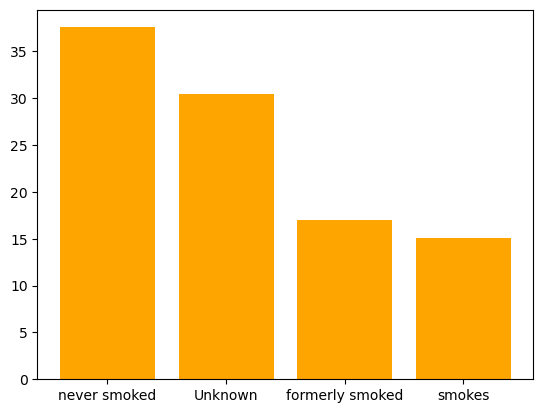

In [100]:
smoking_percent=df['smoking_status'].value_counts(normalize=True)*100
plt.bar(smoking_percent.index, smoking_percent.values, color='orange')
plt.show()

In [102]:
df['stroke'].value_counts()

stroke
0    4590
1     206
Name: count, dtype: int64

<Axes: ylabel='count'>

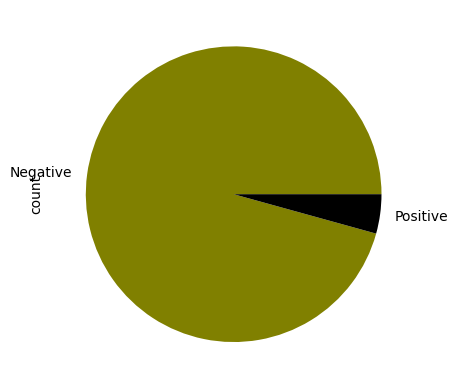

In [111]:
df['stroke'].value_counts().plot(kind= 'pie',labels=['Negative','Positive'], colors=['olive', 'black'])
# most people haven't experienced a stroke

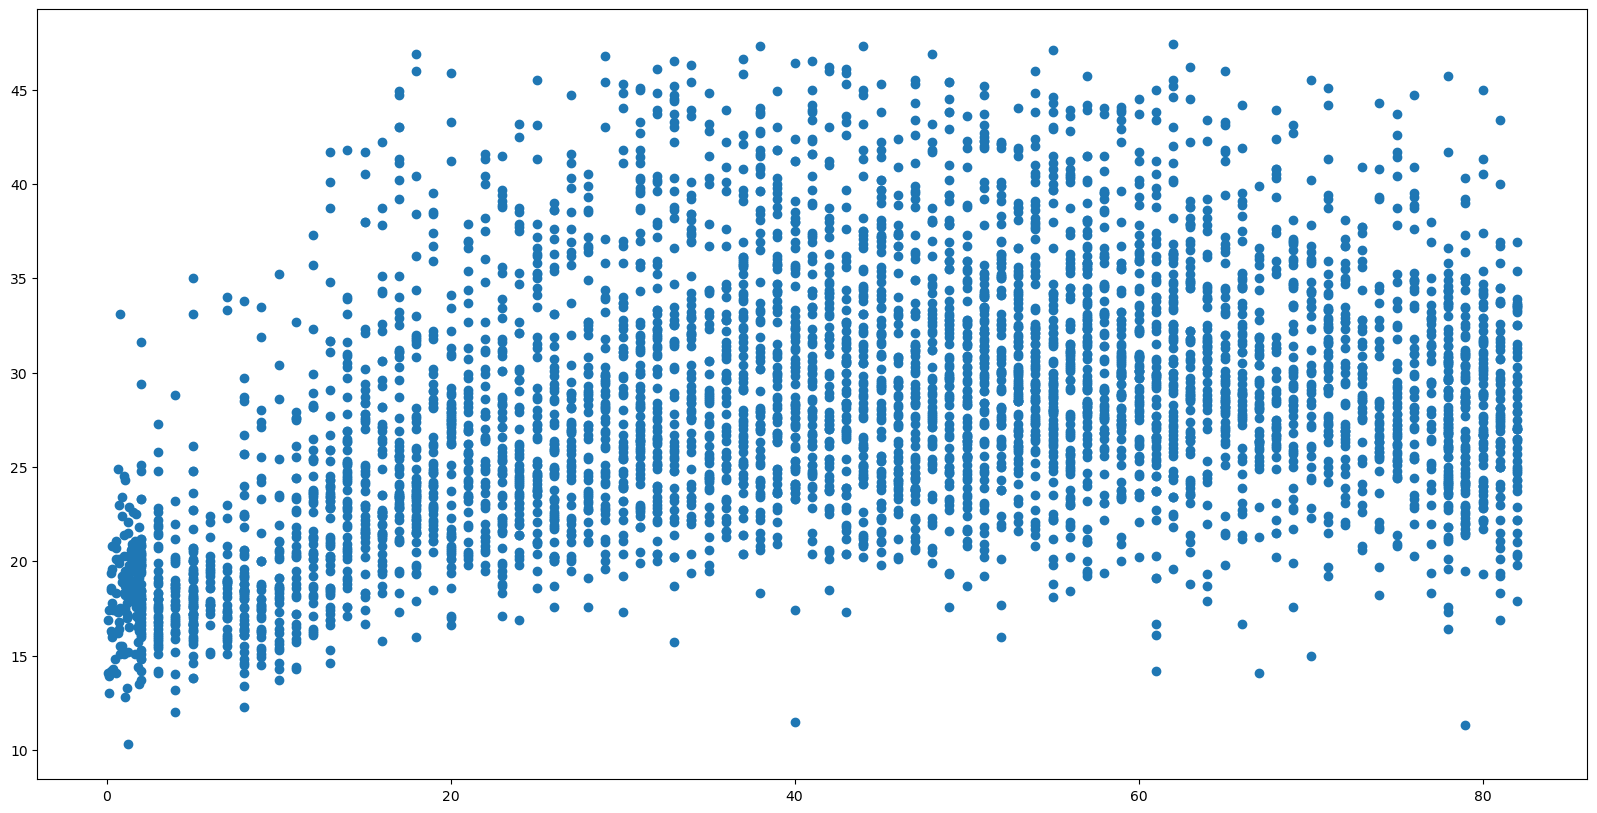

In [121]:
plt.figure(figsize=(20,10))
plt.scatter( x='age', y='bmi', data=df)
plt.xlabel= "AGE"
plt.ylabel= "BMI"
plt.show()

In [133]:
pearson_corr = df['age'].corr(df['bmi'], method='pearson')
print(f'{pearson_corr}')
# age and bmi are positively correlated

0.3842488977024429


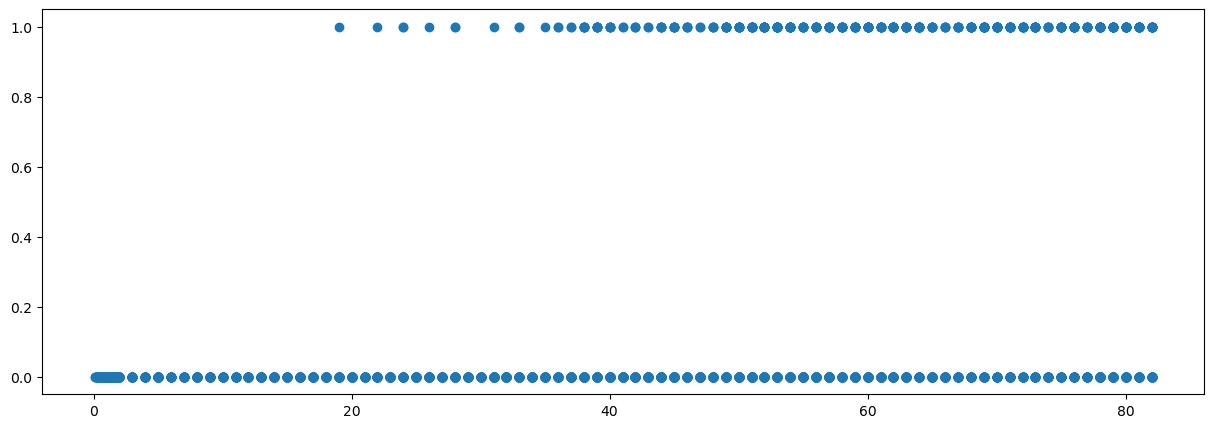

In [139]:
plt.figure(figsize=(15,5))
plt.scatter( x='age', y='hypertension', data=df)
plt.xlabel= "AGE"
plt.ylabel= "HYPERTENSION"
plt.show()

In [143]:
pearson_corr = df['age'].corr(df['hypertension'], method='pearson')
print(f'{pearson_corr}')
# age and hypertension are positively correlated 

0.27755966467879295


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4796 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4796 non-null   int64  
 1   gender             4796 non-null   object 
 2   age                4796 non-null   float64
 3   hypertension       4796 non-null   int64  
 4   heart_disease      4796 non-null   int64  
 5   work_type          4796 non-null   object 
 6   Residence_type     4796 non-null   object 
 7   avg_glucose_level  4796 non-null   float64
 8   bmi                4796 non-null   float64
 9   smoking_status     4796 non-null   object 
 10  stroke             4796 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 449.6+ KB


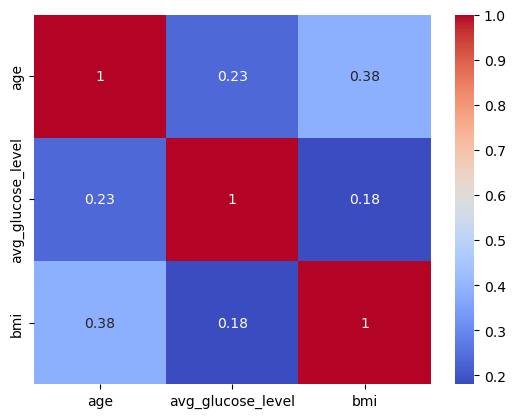

In [167]:
corr = df[['age', 'avg_glucose_level', 'bmi']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

TypeError: 'str' object is not callable

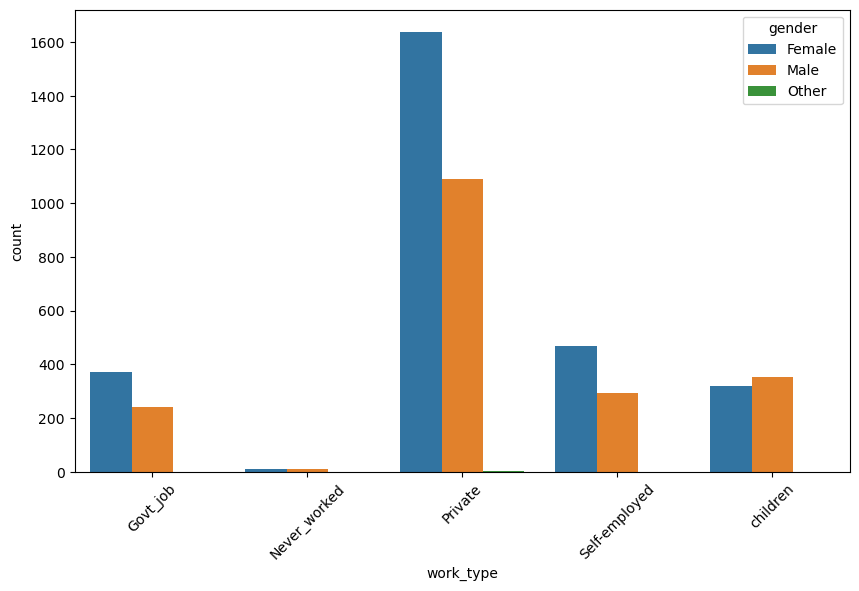

In [169]:
df_grouped = df.groupby(by=['gender', 'work_type']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='work_type', y='count', hue='gender', data=df_grouped)

plt.xticks(rotation=45)
plt.title('Work Type Count by Gender')
plt.ylabel('Count')
plt.xlabel('Work Type')
plt.show()
# in this dataset more no. of females are working as compared to males
# a maximum no. of females are engaged in the private sector

TypeError: 'str' object is not callable

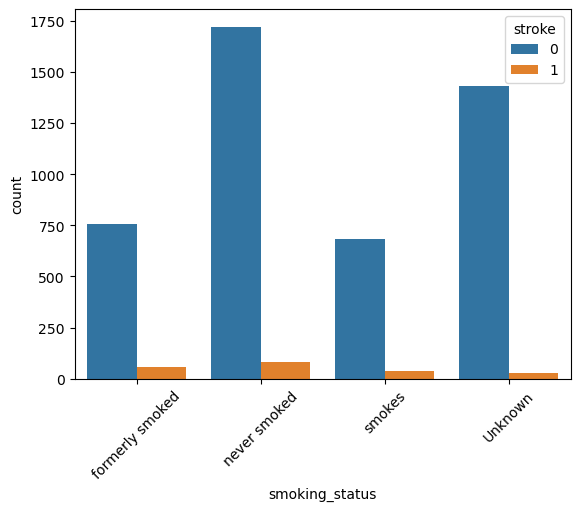

In [171]:
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.xticks(rotation=45)
plt.title("Relation Between Smoking Status and Stroke")
plt.show()
# since, the no. of people who never smoked is significantly large, the graph depicts their cchancees to be higher
# formerly smoked people have significant chances of having a stroke

In [173]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Residence_type'], df['stroke'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square value: {chi2}')
print(f'p-value: {p}')
# there isn't a significant relation between Residence_type and str

Chi-Square value: 0.061370545976822094
p-value: 0.8043427047083203
